In [5]:
from gensim.models import Word2Vec

In [132]:
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import pandas as pd

In [123]:
START_POINT = 1000000
END_POINT = 1046816
LINK = "https://sports.news.naver.com/news.nhn?oid=082&aid="

In [124]:
def fill_zero(point: int):
    str_point = str(point)
    length = len(str_point)
    zero_seq = ''.join(["0" for _ in range(10 - length)])
    return zero_seq + str_point

In [169]:
total_body = pd.DataFrame(columns = ['sentence', 'link'])

for item in tqdm(range(START_POINT, END_POINT)):
    item_str = fill_zero(item)
    item_link = LINK + item_str
    
    req = requests.get(item_link)
    soup = BeautifulSoup(req.text, 'html.parser')
    
    try:
        body = str(soup.select('div.news_end')[0]).split('<br/>')
        body = [text for text in body if '<' not in text and len(text) > 0 and '기자' not in text]
        body = ' '.join(body)
        body = body.split('. ')
        
        if len(body) == 0:
            raise ValueError("Body missing!")
        
        body = pd.DataFrame([body], index = ['sentence']).transpose()
        body['link'] = item_str
        
        total_body = pd.concat([total_body, body])
        
    except Exception as ex:
        print(item_link)
        print(ex)
        pass

https://sports.news.naver.com/news.nhn?oid=082&aid=0001000201
list index out of range
https://sports.news.naver.com/news.nhn?oid=082&aid=0001000489
list index out of range
https://sports.news.naver.com/news.nhn?oid=082&aid=0001000764
list index out of range
https://sports.news.naver.com/news.nhn?oid=082&aid=0001000765
list index out of range
https://sports.news.naver.com/news.nhn?oid=082&aid=0001000779
list index out of range
https://sports.news.naver.com/news.nhn?oid=082&aid=0001000819
list index out of range
https://sports.news.naver.com/news.nhn?oid=082&aid=0001000846
list index out of range
https://sports.news.naver.com/news.nhn?oid=082&aid=0001000944
list index out of range
https://sports.news.naver.com/news.nhn?oid=082&aid=0001000969
list index out of range
https://sports.news.naver.com/news.nhn?oid=082&aid=0001000989
list index out of range
https://sports.news.naver.com/news.nhn?oid=082&aid=0001001497
list index out of range
https://sports.news.naver.com/news.nhn?oid=082&aid=000

In [170]:
from konlpy.tag import Okt
Token = Okt()
total_body['tokenizer'] = total_body['sentence'].apply(lambda x: Token.nouns(x))

In [171]:
total_body

,sentence,link,tokenizer
0,코로나19 사태가 확산하면서 연초부터 글로벌 교역이 얼어붙었다,0001000000,"[코로나, 사태, 확산, 연초, 글로벌, 교역]"
1,지난 2월 세계 각국 수출액을 비교한 결과 68개 조사대상국 가운데 37곳의 무역액...,0001000000,"[지난, 세계, 각국, 수출, 액, 비교, 결과, 개, 상국, 가운데, 곳, 무역,..."
2,특히 한국은 2월 수출액이 4% 가까이 증가하면서 주요 선진국 가운데 증가율로 3위...,0001000000,"[한국, 수출, 액, 가까이, 증가, 주요, 선진국, 가운데, 증가, 율, 위, 기록]"
3,"이는 조업일수 증가에 따른 결과로, 전망은 밝지 않은 상태다",0001000000,"[조업, 일수, 증가, 결과, 전망, 상태]"
4,"3일 세계무역기구(WTO)의 월간 상품무역 통계를 분석한 결과, 한국의 2월 수출액...",0001000000,"[세계, 무역, 기구, 의, 월간, 상품, 무역, 통계, 분석, 결과, 한국, 수출..."
...,...,...,...
4,또 노 전대통령 생가 입구 봉하로 구간에는 ‘하의로’ 도로명을 부여했다,0001046815,"[또, 노, 전대통령, 생가, 입구, 봉하, 구간, 하의, 도로명, 부여]"
5,또 노 전 대통령 생가인 봉하마을 관광안내소 주변에 이번 명예도로명 부여 경위와 의...,0001046815,"[또, 노, 전, 대통령, 생가, 봉하마을, 관광, 안내소, 주변, 이번, 명예, ..."
6,앞서 전남 신안군은 지난달 김해시와의 자매결연 1주년 맞아 김대중 전 대통령의 고향...,0001046815,"[앞서, 전남, 신안군, 지난달, 김해시, 자매, 결연, 주년, 김대중, 전, 대통..."
7,가야왕도인 김해시와 천사의 섬으로 불리는 신안군은 지난해 9월 24일 전직 대통령을...,0001046815,"[가야, 왕도, 김해시, 천사, 섬, 신안군, 지난해, 전직, 대통령, 배출, 고장..."


In [172]:
model = Word2Vec(sentences = total_body['tokenizer'], size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [248]:
from sklearn.cluster import KMeans

data = pd.DataFrame([model.wv.vocab.keys()], index = ['word']).transpose()

In [290]:
inertia = list()
for e in tqdm(range(3, 30)):
    kmeans = KMeans(n_clusters = e)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

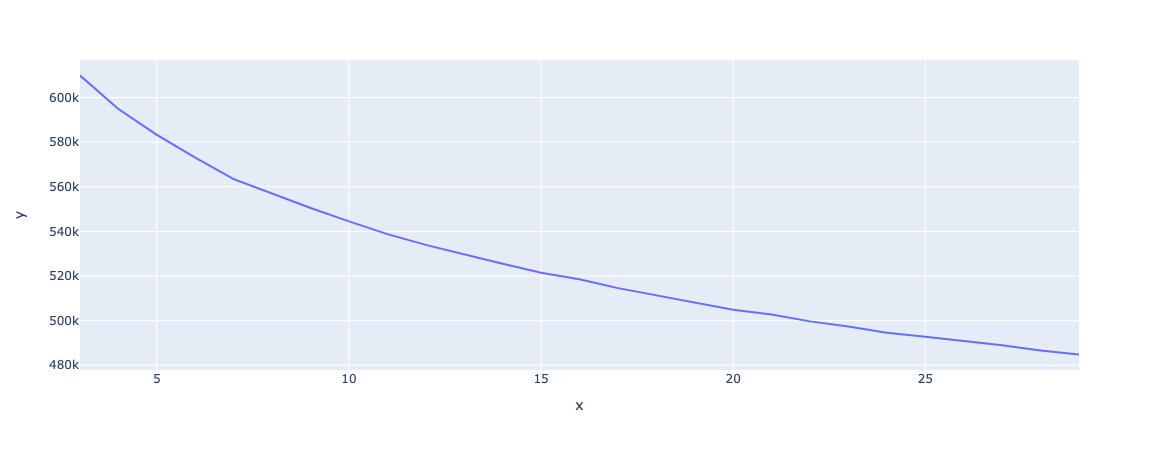

In [292]:
import plotly.express as px

px.line(y = inertia, x = range(3, 30))

In [293]:
CLUSTER = 30

In [294]:
kmeans = KMeans(n_clusters = CLUSTER)
kmeans.fit(X)
inertia.append(kmeans.inertia_)
X = model.wv[model.wv.vocab]

In [295]:
labels = kmeans.labels_
centroid = kmeans.cluster_centers_

data['cluster_label'] = labels

In [313]:
count = 0
for vec in centroid:
    print(f"****** INDEX: {count} ******")
    similarity = model.wv.similar_by_vector(vec, topn = 20)
    print([key for key, value in similarity])
    count += 1

****** INDEX: 0 ******
['치노', '스트로베리', '모카', '포테이토', '퍼퓸', '크리미', '맥심', '루미', '블러드', '시크', '플랫', '허니', '프렌치', '엑스트라', '스푼', '라즈베리', '립스틱', '코코넛', '스파클링', '펄']
****** INDEX: 1 ******
['탈구', '종양', '협착증', '요도', '전립선', '뇌졸중', '백내장', '관절염', '당뇨병', '복부', '파킨슨병', '혈관', '비염', '한약', '변비', '호르몬', '갑상선', '고혈압', '고지혈증', '슬개골']
****** INDEX: 2 ******
['야채', '주스', '양념', '소고기', '구이', '된장', '샐러드', '볶음', '튀김', '간장', '생선', '토마토', '육수', '바나나', '옥수수', '고기', '과일', '국물', '육류', '햄']
****** INDEX: 3 ******
['추심', '증여세', '양도소득세', '상속세', '계산서', '계약해지', '양도', '벌점', '증여', '계약금', '청구', '추징', '귀속', '도세', '처분', '감액', '납입', '해지', '거절', '미납']
****** INDEX: 4 ******
['글라스', '믹스', '로우', '나이트', '슈즈', '플렉스', '아쿠아', '와이드', '폴', '드', '소프트', '프렌치', '다이슨', '핏', '리얼', '나이키', '체인지', '큐브', '플로', '블랙']
****** INDEX: 5 ******
['권고', '절차', '규정', '사유', '법적', '명시', '통지', '여부', '중지', '간소화', '처분', '조항', '즉시', '추후', '요건', '약관', '실효', '일괄', '계약서', '판단']
****** INDEX: 6 ******
['지하수', '유실', '오염원', '배수로', '하천', '수질오염', '오염', '염분', '악취', '해

In [345]:
def get_cluster(kw):
    global data
    return data[data['word'] == kw]['cluster_label'].values[0]

In [350]:
model.wv.most_similar('현무')

[('치치', 0.8752561211585999),
 ('백진희', 0.8685622215270996),
 ('남희석', 0.868144154548645),
 ('서모', 0.8669694662094116),
 ('신봉선', 0.8667634725570679),
 ('박주현', 0.866719126701355),
 ('오덕', 0.8659499883651733),
 ('조르바', 0.8639810085296631),
 ('투루판', 0.8618869781494141),
 ('남천우', 0.8608510494232178)]